In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# removed this from wiglecsv: WigleWifi-1.4,appRelease=Kismet202208R1,model=Kismet,release=2022.08.R1,device=kismet,display=kismet,board=kismet,brand=kismet
csvd = pd.read_csv('/home/vlaghe/proj/warpi/data/buc2run/buc2runweli-20230114-14-53-28-1.wiglecsv')
# csvd = pd.read_csv('/path/to/your/file.wiglecsv')
#csvd.describe()  # summarry of data
#csvd.AuthMode.unique() # get uniq vals 4 one column
#csvd.drop_duplicates(subset='MAC') # drop duplicates based on col
csvd.sample(10)  # show 10 random sameples

,MAC,SSID,AuthMode,FirstSeen,Channel,RSSI,CurrentLatitude,CurrentLongitude,AltitudeMeters,AccuracyMeters,Type
11935,EA:63:DA:1E:75:22,AGS Luxury Pawn & Watches,[WPA2-PSK-CCMP][ESS],2023-01-14 15:14:00,1,-77,44.447083,26.096853,86.4,0,WIFI
10974,90:5C:44:6F:6A:7C,UPC9A6243C,[WPA-PSK-CCMP+TKIP] [WPA2-PSK-CCMP+TKIP][ESS],2023-01-14 15:12:29,11,-67,44.443177,26.098643,77.7,0,WIFI
32852,E0:63:DA:07:17:86,NaN,[ESS],2023-01-14 16:51:56,6,-79,44.453764,26.109447,73.8,0,WIFI
20006,38:83:9A:9C:04:34,70mai_d06_0434,[WPA2-PSK-CCMP][ESS],2023-01-14 15:34:50,6,-75,44.428748,26.052528,94.1,0,WIFI
9657,BE:7A:BF:88:3D:8C,AndroidAP1757,[WPA2-PSK-CCMP][ESS],2023-01-14 14:53:58,6,-37,44.435763,26.103333,79.7,0,WIFI
29995,49:C4:3E:BA:9F:F5,49:C4:3E:BA:9F:F5,Misc [LE],2023-01-14 16:43:11,0,0,44.452105,26.076795,76.9,0,BLE
22685,EB:33:52:1F:60:66,EB:33:52:1F:60:66,Misc [LE],2023-01-14 16:22:58,0,0,44.428955,26.053563,92.1,0,BLE
20856,62:5C:FC:1C:C2:1B,NaN,[ESS],2023-01-14 15:37:24,6,-73,44.428965,26.051498,94.1,0,WIFI
30381,34:75:63:C6:AD:D2,70mai_d06_add2,[WPA2-PSK-CCMP][ESS],2023-01-14 16:31:27,6,-55,44.452108,26.081936,69.1,0,WIFI
11197,DC:91:66:5A:17:00,HUAWEI-1BYO0W,[WPA2-PSK-CCMP][ESS],2023-01-14 15:12:16,1,-73,44.443256,26.098624,69.8,0,WIFI


## 📊 Some Stats 
Simple statistics about our data:
- Most Used SSIDs
- Open VS Hidden SSIDs
- Frequently Used Channels
- WiFi Security Protocols *(Open, WPA[1-3], Mixed)*

### Most Used SSIDs
I wanted to take a look @ the most common names when it comes to choosing SSIDs

From the perspective of an attacker / WiFi assessment this data can be quite fruitful, given that you can map the most used SSIDs in an area & use that to lunch further attacks for initail access *(e.g rogue AP, phising)* 

> **NOTE**: this is calculated from all of my dataset => the frequency @ which SSID names are counted are directly correlated with the GPS coords => if I stayed more in 1 place, the SSIDs in that area will show more times than others 

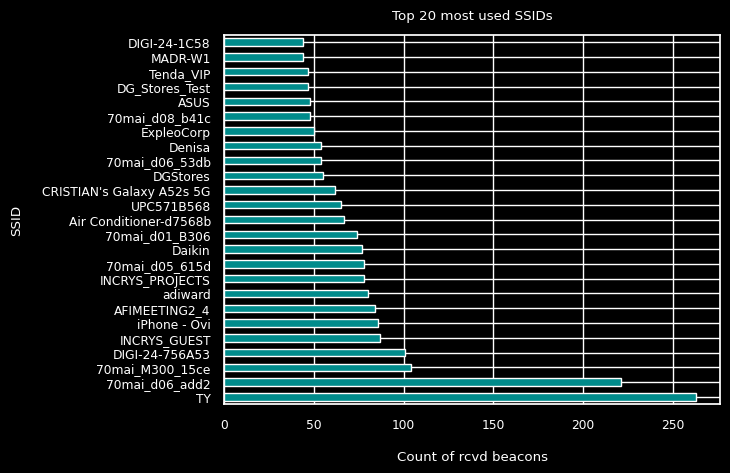

In [40]:
# Filter out MAC addresses from SSIDs
#   && get counts of unique names
regex = r"^([0-9A-Fa-f]{2}[:-]){5}([0-9A-Fa-f]{2})$" 
SSIDs = csvd[csvd.SSID.str.match(regex)==False].SSID
counts = SSIDs.value_counts()

# drop the first 2 columns (my phone hotspot & car camera)
counts = counts.iloc[2:]    
# counts.head(10) # | counts.index

TOP = 25    # change me to your liking 

# Style plot
plt.style.use('dark_background')
counts[:TOP].plot(kind='barh', color='darkcyan')
sns.set(font_scale=0.8)
plt.ylabel("SSID", labelpad=14)
plt.xlabel("Count of rcvd beacons", labelpad=14)
plt.title("Top 20 most used SSIDs", y=1.02);

# Want sorting?
# sort alphabetically : .sort_index(ascending=True)
# sort by value       : .sort_values(ascending=False)
# get % count         : .value_counts(normalize=True)

# total unique SSIDs: csvd.SSID.nunique()
# uniq_ssids = csvd.SSID.unique()

### 🔢 Frequently Used Channels

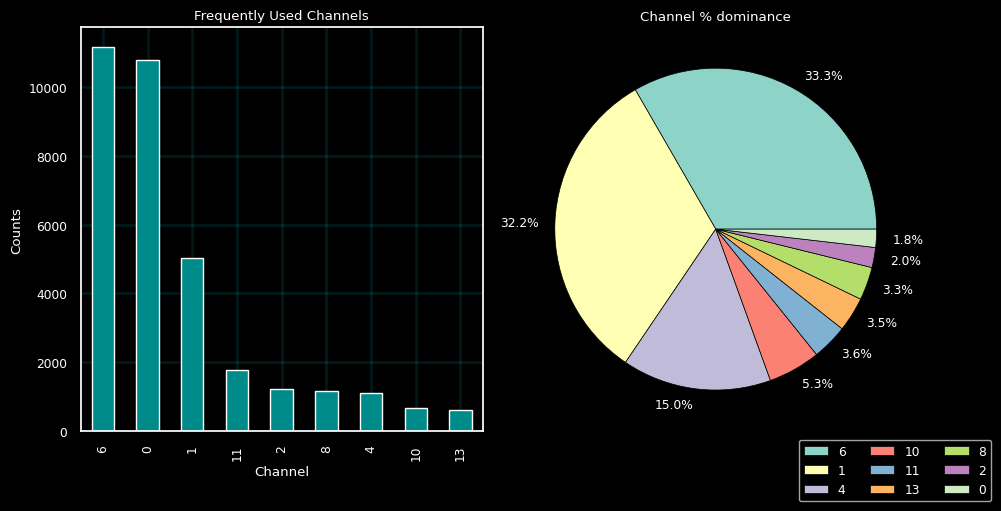

In [43]:
uniq_channels = csvd.Channel.unique()
counts = csvd.Channel.value_counts()
percs  = csvd.Channel.value_counts(normalize=True).mul(100).round(1)
# create a new df: channels = pd.concat([counts, percs], axis=1, keys=['count', 'perc'])

plt.figure(figsize=(10,5))

## Freq used channs
plt.subplot(1, 2, 1)
plt.title("Frequently Used Channels");
plt.style.use('dark_background')
plt.ylabel("Counts")
plt.xlabel("Channel")
plt.grid(visible=True, color='aqua', alpha=0.1, linestyle='-', linewidth=2)
counts.plot(kind='bar', color='darkcyan')
# or 1 liner -?
# csvd.Channel.value_counts().plot(kind='bar', color='darkcyan') 

## Channel % dominance
plt.subplot(1, 2, 2)
plt.title("Channel % dominance");
plt.pie(
    counts, labels=percs.astype(str) + '%', 
    labeldistance=1.1, 
    wedgeprops = {'linewidth' : 0.5, 'edgecolor' : 'black'}
)
plt.legend(uniq_channels, bbox_to_anchor=(1.2, -0.1), ncol=3, loc='right')
plt.tight_layout()

### 🔐 WiFi AP Encryption Distribution

2595 4425
{'Open': 4425, 'WPA': 84, 'WPA2': 13032, 'WPA3': 149, 'WPA | WPA2': 5313}


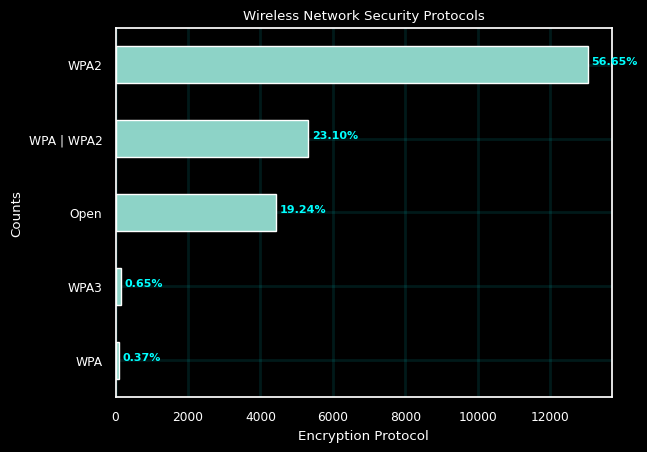

In [42]:
# Open = [ESS] and [WPS][ESS]
# WEP  = [WEP][ESS]
# WPA  = [WPA-PSK-CCMP][ESS] 
# WPA2 = [WPA2-PSK-CCMP][WPS][ESS] 
#        [WPA2-PSK-CCMP][ESS]
#        [WPA2-EAP-CCMP+TKIP][ESS]
# WPA3 = [WPA3-PSK-CCMP][ESS]
# Mixed Mode = [WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][WPS][ESS]
#              [WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][ESS]
#              [WPA-EAP-CCMP+TKIP][WPA2-EAP-CCMP+TKIP][ESS]

# Filter networks based on encryption protocols
#    NOTE: this feels retarded
bluetooth = csvd[csvd.AuthMode.str.match("Misc")]
open_nets = csvd.query("AuthMode == '[ESS]'")
uniq_open_ssids = open_nets.SSID.unique()

wpa_nets  = csvd[csvd.AuthMode.str.match("^\[WPA-[^\s]*\]\[ESS\]$")]
wpa2_nets = csvd[csvd.AuthMode.str.match("\[WPA2-")]
wpa3_nets = csvd[csvd.AuthMode.str.match("\[WPA3-")]
wpa_nd_wpa2 = csvd[csvd.AuthMode.str.contains("(?=.*WPA)+\s(?=.*WPA2)")]
print(len(open_nets.drop_duplicates(subset='MAC')), len(open_nets))

# Security Type Comparison
# create a dict & df from data
data = {
    'Open': len(open_nets),
    'WPA': len(wpa_nets),
    'WPA2': len(wpa2_nets),
    'WPA3': len(wpa3_nets),
    'WPA | WPA2': len(wpa_nd_wpa2)
}
print(data)
df = pd.DataFrame.from_dict(data, orient='index', columns=['Count']).sort_values(by='Count')
df['Percentage'] = df['Count'] / df['Count'].sum()*100

# plot & style
ax = df['Count'].plot(kind='barh')
plt.title('Wireless Network Security Protocols')
plt.xlabel('Encryption Protocol')
plt.ylabel('Counts')
plt.grid(visible=True, color='aqua', alpha=0.1, linestyle='-', linewidth=2)

# add % as bar labels
for i in range(len(df)):
    ax.text(
        df.loc[df.index[i],'Count'] + 100, i, f'{df.loc[df.index[i],"Percentage"]:.2f}%',
        color="cyan", fontweight='bold', fontsize=8
    )
plt.show()

### 🕵 Open VS Hidden Nets
- [need .network logs enabled in kismet conf?](https://www.techrepublic.com/article/try-kismet-for-detecting-hidden-80211-wireless-networks/)
- [decloaking Hidden Wifi Nets](https://www.bengrewell.com/2018/02/11/decloaking_hidden_wireless/)